# QUESTION-1A

magnitude of N(0,1) at mean 0 = 0.3989422804014327
magnitude of N(3,2) at mean 3 = 0.28209479177387814


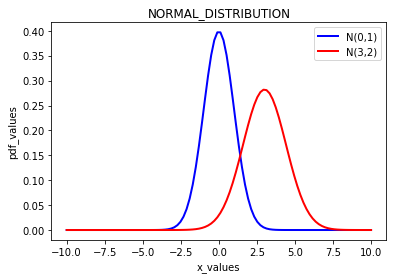

In [222]:
# lets import all the necessary libraries

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10,10,100)          # generating 100 samples of x over the interval
                                     #np.linspace(start,stop,num) which returns evenly spaced numbers over a specified interval

# pdf of x for x∼ N(0,1)
mean_1 = 0
variance_1 = 1
std_1 = math.sqrt(variance_1)
y_1 = norm.pdf(x, mean_1, std_1)      # norm.pdf returns a pdf value at x,mean_1,variance_1
mag_1 =norm.pdf(0,mean_1,std_1)       # pdf at x = mean_1,mean = 0,standard deviation = 1
print('magnitude of N(0,1) at mean 0 =',mag_1)   

# pdf of x for x∼ N(3,2)
mean_2 = 3
variance_2 = 2
std_2 = math.sqrt(variance_2)
y_2 = norm.pdf(x, mean_2, std_2)     # norm.pdf returns a pdf value at x,mean_2,variance_2
mag_2 =norm.pdf(3,mean_2,std_2)       # pdf at x = mean_2,mean = 3,standard deviation = 2
print('magnitude of N(3,2) at mean 3 =',mag_2)

plt.plot(x,y_1,linewidth=2,color='blue',label='N(0,1)')
plt.plot(x,y_2,linewidth=2,color='red',label='N(3,2)')
plt.xlabel('x_values')
plt.ylabel('pdf_values')
plt.title('NORMAL_DISTRIBUTION')
plt.legend()
plt.show()

#comments :-
# 1.Mean determines the location of the centre of the graph and change in mean determines the graph to be shifted left or right
#   mean of N(0,1) is 0 and mean of N(3,2) is 3 so the graph with mean = 3 shifted right wrt to the graph with mean = 0
# 2.Standard deviation determines the height(magnitude) and width of the graph 
#   when SD = small then curve will be narrow and taller
#   when SD = big then curve will be wide spread and shorter
#   SD of N(0,1) is 1 and SD of N(3,2) is 1.414 
#   SD of N(0,1) is smaller than N(3,2) so it is narrow and taller 
#   SD of N(3,2) is bigger than N(0,1) so it is wider spread and shorter
#   magnitude of N(0,1) is larger than N(3,2)


# QUESTION-1B

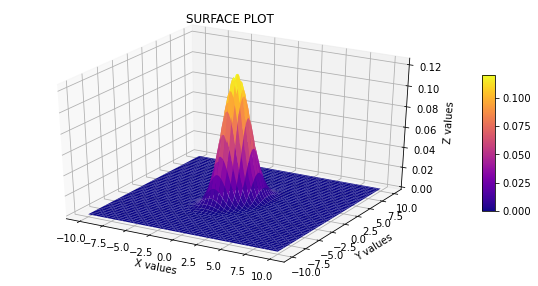

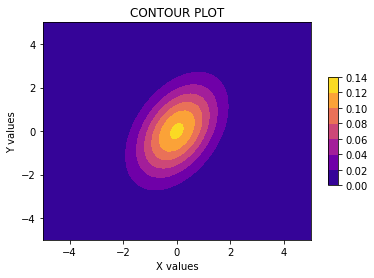

In [223]:
# lets import all the necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

X = np.linspace(-10,10, 100)# 2-dimensional distribution will be over variables X and Y
Y = np.linspace(-10,10, 100)#np.linspace(start,stop,num) which returns evenly spaced numbers over a specified interval
X, Y = np.meshgrid(X, Y)    #np.meshgrid returns two 2-Dimensional arrays representing the X and Y coordinates of all the points

mean = np.array([0,0])             # Mean vector 
Sigma = np.array([[1,0.6],[0.6,2]])#covariance matrix
z = multivariate_normal(mean,Sigma)#Computing normal distribution for each combination of mean and sigma 
stack = np.dstack((X,Y))              #np.dstack Returns combined array index by index 
Z = z.pdf(stack)                     #Computing probability density function
                        
#Plot in 3D
fig = plt.figure(figsize=(10,5)) #figsize represents Width, height of plot
ax = fig.gca(projection='3d')   #fig.gca returns the current axes
surf = ax.plot_surface(X, Y, Z,cmap=cm.plasma)#cmap represents color map in matplotlib
#colorbar is a separate axes that can provide a key for the meaning of colors in a plot
#shrink represents the Fraction by which to multiply the size of the colorbarRatio of long to short dimensions
fig.colorbar(surf, shrink=0.5, aspect=10)# aspect represents Ratio of long to short dimensions
ax.set_xlabel('X values')                      
ax.set_ylabel('Y values')                     
ax.set_zlabel('Z values')
ax.set_title('SURFACE PLOT')
plt.show()

#Contour plot
fig,ax=plt.subplots(1,1)
contour = ax.contourf(X, Y, Z,cmap=cm.plasma)
fig.colorbar(contour, shrink=0.5, aspect=10)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('CONTOUR PLOT')
plt.show()

# QUESTION-2

In [221]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# loading the data set
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv('iris.csv.data', names = attributes)  # read the csv data
data.columns = attributes                                # represents index for columns
data.groupby('species').size()                   
data.sort_values('species', axis = 0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica


In [220]:
import random
#splitting the data set into training set and test set
# we observed in the above output that each class contains 50 samples and from (0-49) we have samples of iris-setosa class,
  #from(50,99) we have samples of iris-versicolor and from(100,149) we have samples of iris-viriginica
# so we have to choose samples randomly in each class with 70% samples in training set and 30% samples in test set
#i.e each class contains 50 samples so training set of each class contains 35 samples and test set contains 15 samples
#splitting into training set and test set samples

# loading the iris dataset
iris = datasets.load_iris() # loading the iris dataset
# converting into a Pandas dataframe
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])
dat = data1[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)",'species']]  
# extracting  feature values and  target label
#random.sample chooses random values in the interval
X_train1 = random.sample(range(0, 49), 35)
X_test1 =[]
for x in range (0,49):
    if(x  not in X_train1 ):
        X_test1.append(x)
dat1_train=df.loc[X_train1,:]
X_train2 = random.sample(range(50, 99), 35)
X_test2 =[]
for x in range (50,99):
    if(x  not in X_train2 ):
        X_test2.append(x)
dat2_train=df.loc[X_train2,:]
X_train3 = random.sample(range(100, 149), 35)
X_test3 =[]
for x in range (100,149):
    if(x  not in X_train3 ):
        X_test3.append(x)
dat3_train=df.loc[X_train3,:]
Z=[dat1_train,dat2_train,dat3_train]
dat_train=pd.concat(Z)        



In [183]:
X_test1

[2, 3, 7, 9, 16, 20, 23, 27, 35, 38, 41, 43, 46, 47]

In [188]:
X_test2

[52, 54, 55, 59, 63, 64, 71, 74, 78, 86, 89, 91, 93, 95]

In [190]:
X_test3

[101, 113, 119, 124, 127, 128, 129, 133, 137, 138, 139, 141, 142, 145]

In [191]:
df1_test=df.loc[X_test1,:]

In [192]:
df2_test=df.loc[X_test2,:]

In [193]:
df3_test=df.loc[randomlist3_test,:]

In [194]:
Z2=[df1_test,df2_test,df3_test]
df_test=pd.concat(Z2)#Concatenate pandas objects along a particular axis with optional set logic along the other axes

In [207]:
X_train = df_train.iloc[:,0:4]    
y_train = df_train.iloc[:,4]
X_test = df_test.iloc[:,0:4]    
y_test = df_test.iloc[:,4]


In [210]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_compare=pd.DataFrame({'true values':y_test,"predicted values":y_pred})
y_compare

,true values,predicted values
0,0.0,0.0
2,0.0,0.0
3,0.0,0.0
9,0.0,0.0
28,0.0,0.0
29,0.0,0.0
32,0.0,0.0
33,0.0,0.0
34,0.0,0.0
35,0.0,0.0


In [211]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix              
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')     
confusion_matrix(y_test, y_pred)

Accuracy: 95.34883720930233 %


array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 13]], dtype=int64)